In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [20]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [21]:
# calculate duplicates
duplicates = df.duplicated()
print(duplicates.any())

True


In [22]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
# reset indexes 
df = df.reset_index(drop=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96424,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96425,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96426,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96427,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [23]:
# calculate duplicates
duplicates = df.duplicated()
print(duplicates.any())

False


In [24]:
df = df.drop(columns='Formatted Date', axis=1)
df = df.drop(columns='Daily Summary', axis=1)
df = df.drop(columns='Loud Cover', axis=1)
df.shape

(96429, 9)

In [25]:
# Check whether any missing values are available
df.isnull().values.any()

True

In [26]:
# check the count of each column's null values 
df.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
dtype: int64

In [27]:
# since the percentage is very low, drop the missing values
df = df.dropna(axis=0)
df = df.reset_index(drop=True)
df.shape

(95912, 9)

In [28]:
df.isnull().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
dtype: int64

In [29]:
# dropping outliers
df = df.drop(df[df['Pressure (millibars)'] < 200].index)
print("After Shape:",df.shape)
df = df.reset_index(drop=True)

After Shape: (94624, 9)


C:\Users\Sahani\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >,
        <Axes: >]], dtype=object)

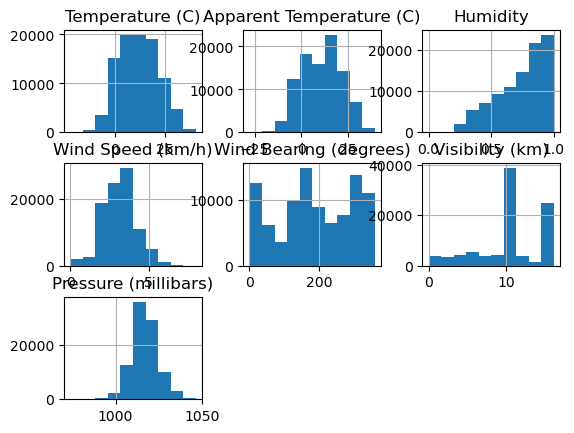

In [30]:
# create columns variables to hold the columns that need transformation
columns = ['Wind Speed (km/h)']

# create the function transformer object with logarithm transformation
logarithm_transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation 
data_new = logarithm_transformer.transform(df[columns])
df_new = pd.DataFrame(data_new, columns=columns)

# replace new values with previous data frame
df['Wind Speed (km/h)'] = df_new['Wind Speed (km/h)']

df.hist()

In [31]:
df.columns

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

C:\Users\Sahani\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


array([[<Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Apparent Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Wind Bearing (degrees)'}>,
        <Axes: title={'center': 'Visibility (km)'}>],
       [<Axes: title={'center': 'Pressure (millibars)'}>, <Axes: >,
        <Axes: >]], dtype=object)

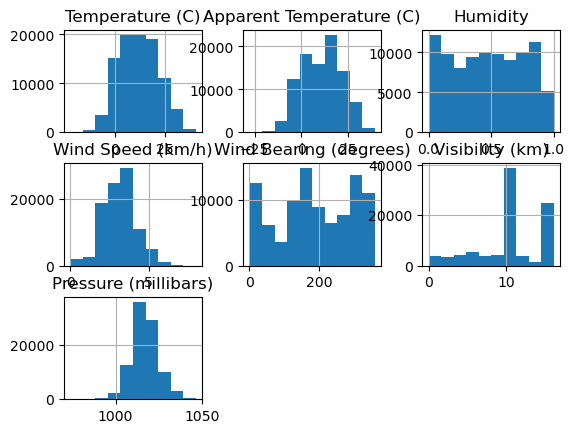

In [32]:
# apply transformations for left skewed distributions
columns = ['Humidity']
# exponential transformation
exponential_transformer = FunctionTransformer(lambda x: x ** 3, validate=True)
# apply the transformation 
exp_data = exponential_transformer.transform(df[columns])
exp_df = pd.DataFrame(exp_data, columns=columns)
# replace new values with previous data frame
df['Humidity'] = exp_df['Humidity']
df.hist()

In [34]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# fit the data
enc.fit(df[['Summary']])
cols = enc.get_feature_names_out()
enc_df = pd.DataFrame(enc.transform(df[['Summary']]).toarray(),columns=cols)

df = df.join(enc_df)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,Partly Cloudy,rain,9.472222,7.388889,0.704969,3.757619,251.0,15.8263,1015.13,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Partly Cloudy,rain,9.355556,7.227778,0.636056,3.776851,259.0,15.8263,1015.63,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mostly Cloudy,rain,9.377778,9.377778,0.704969,1.982019,204.0,14.9569,1015.94,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Partly Cloudy,rain,8.288889,5.944444,0.571787,3.755476,269.0,15.8263,1016.41,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Mostly Cloudy,rain,8.755556,6.977778,0.571787,3.323342,259.0,15.8263,1016.51,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94619,Partly Cloudy,rain,26.016667,26.016667,0.079507,3.316067,31.0,16.1000,1014.36,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94620,Partly Cloudy,rain,24.583333,24.583333,0.110592,3.177216,20.0,15.5526,1015.16,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94621,Partly Cloudy,rain,22.038889,22.038889,0.175616,2.997299,30.0,16.1000,1015.66,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94622,Partly Cloudy,rain,21.522222,21.522222,0.216000,3.244904,20.0,16.1000,1015.95,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#Convert to categorical type, then assign categorical codes to the attributes
df['Precip Type'] = df['Precip Type'].astype('category').cat.codes
df.dtypes

Summary                                         object
Precip Type                                       int8
Temperature (C)                                float64
Apparent Temperature (C)                       float64
Humidity                                       float64
Wind Speed (km/h)                              float64
Wind Bearing (degrees)                         float64
Visibility (km)                                float64
Pressure (millibars)                           float64
Summary_Breezy                                 float64
Summary_Breezy and Dry                         float64
Summary_Breezy and Foggy                       float64
Summary_Breezy and Mostly Cloudy               float64
Summary_Breezy and Overcast                    float64
Summary_Breezy and Partly Cloudy               float64
Summary_Clear                                  float64
Summary_Dangerously Windy and Partly Cloudy    float64
Summary_Drizzle                                float64
Summary_Dr

In [36]:
# drop summary column
df = df.drop(columns='Summary', axis=1)
df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,0,9.472222,7.388889,0.704969,3.757619,251.0,15.8263,1015.13,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,9.355556,7.227778,0.636056,3.776851,259.0,15.8263,1015.63,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,9.377778,9.377778,0.704969,1.982019,204.0,14.9569,1015.94,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,8.288889,5.944444,0.571787,3.755476,269.0,15.8263,1016.41,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,8.755556,6.977778,0.571787,3.323342,259.0,15.8263,1016.51,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df['Precip Type'].value_counts()

0    84092
1    10532
Name: Precip Type, dtype: int64

In [38]:
#Removing Categorical Features before the standardization
columns_value_new = ['Temperature (C)', 'Humidity','Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)']
columns_value_new

['Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Visibility (km)',
 'Pressure (millibars)']

In [39]:
#Applying Standardization 
#step 1 - Calling the standard scaler
scaler = StandardScaler() 

#Transformation of other features
scaler.fit(df[columns_value_new])
df[columns_value_new] = scaler.transform(df[columns_value_new])

df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,0,-0.259556,7.388889,0.800614,0.608787,251.0,1.302552,-0.215109,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.271754,7.227778,0.559556,0.626625,259.0,1.302552,-0.150765,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-0.269430,9.377778,0.800614,-1.038143,204.0,1.093963,-0.110872,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-0.383277,5.944444,0.334742,0.606800,269.0,1.302552,-0.050389,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.334486,6.977778,0.334742,0.205980,259.0,1.302552,-0.037521,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


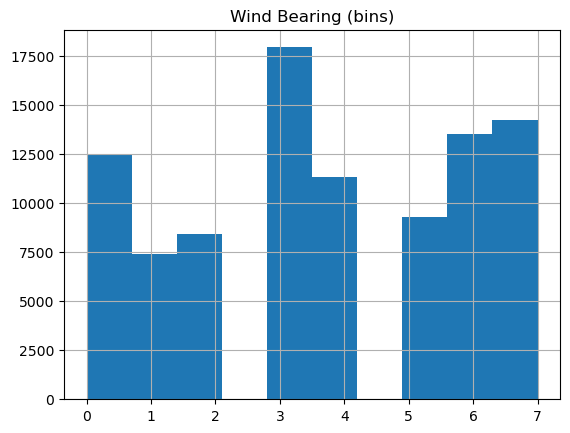

In [40]:
data_disc = pd.DataFrame(df, columns=['Wind Bearing (degrees)'])

# fit the scaler to the  data
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans') 
discretizer.fit(data_disc)

data_discretized = discretizer.transform(data_disc)

data_discretized = pd.DataFrame(data_discretized,columns=['Wind Bearing (bins)'])

data_discretized.hist();

array([[<Axes: title={'center': 'Precip Type'}>,
        <Axes: title={'center': 'Temperature (C)'}>,
        <Axes: title={'center': 'Humidity'}>],
       [<Axes: title={'center': 'Wind Speed (km/h)'}>,
        <Axes: title={'center': 'Visibility (km)'}>,
        <Axes: title={'center': 'Pressure (millibars)'}>],
       [<Axes: title={'center': 'Wind Bearing (degrees)'}>, <Axes: >,
        <Axes: >]], dtype=object)

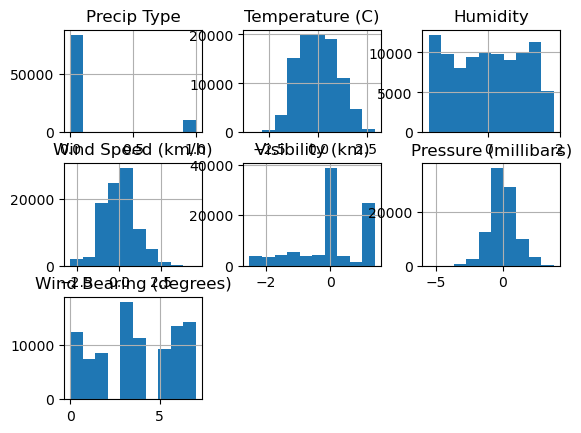

In [41]:
columns_value_new = columns_value_new = ['Precip Type', 'Temperature (C)', 'Humidity','Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)', 'Wind Bearing (degrees)']
df['Wind Bearing (degrees)'] = data_discretized
df[columns_value_new].hist()

In [52]:
X1.columns

Index(['Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [53]:
df.columns

Index(['Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Summary_Breezy', 'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy'],
      dtype='object')

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Precip Type,1.000000,-0.563172,0.246431,-0.073588,-0.041301,-0.317721,0.301145
Temperature (C),-0.563172,1.000000,-0.595193,0.022391,0.029487,0.393396,-0.310378
Humidity,0.246431,-0.595193,1.000000,-0.255882,0.002888,-0.461140,0.041900
Wind Speed (km/h),-0.073588,0.022391,-0.255882,1.000000,0.116137,0.108720,-0.251721
Wind Bearing (degrees),-0.041301,0.029487,0.002888,0.116137,1.000000,0.047978,-0.077348
Visibility (km),-0.317721,0.393396,-0.461140,0.108720,0.047978,1.000000,-0.162904
Pressure (millibars),0.301145,-0.310378,0.041900,-0.251721,-0.077348,-0.162904,1.000000


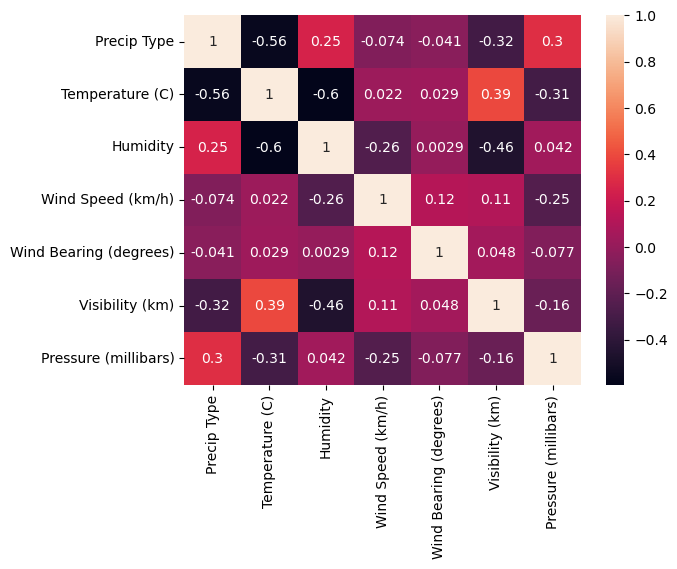

In [44]:
# check the correlation
X1 = df.copy()
cols = ['Precip Type', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
X1 = X1[cols]
sns.heatmap(X1.corr(), annot=True)
X1.corr()

In [45]:
# Put the target (apparent temperature) in another DataFrame
target = pd.DataFrame(df, columns=["Apparent Temperature (C)"])
target.head(10)

,Apparent Temperature (C)
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
5,7.111111
6,5.522222
7,6.527778
8,10.822222
9,13.772222


In [47]:
X = df.copy() #dataset has been copied to  X
y_true = target
X.head(10)

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,...,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy
0,0,-0.259556,0.800614,0.608787,5.0,1.302552,-0.215109,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.271754,0.559556,0.626625,5.0,1.302552,-0.150765,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,-0.269430,0.800614,-1.038143,4.0,1.093963,-0.110872,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-0.383277,0.334742,0.606800,5.0,1.302552,-0.050389,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.334486,0.334742,0.205980,5.0,1.302552,-0.037521,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,-0.285694,0.482841,0.588860,5.0,1.093963,-0.018217,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,-0.441362,1.333731,0.385013,5.0,-0.099633,-0.010496,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,-0.332743,0.800614,0.612759,5.0,-0.099633,0.004946,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,-0.118409,0.263316,0.243941,5.0,-0.099633,0.073151,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.190023,-0.359749,0.406178,6.0,-0.099633,0.053847,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# Split the data

X_df = X1

X_train, X_test, Y_train, Y_test = train_test_split(X_df, target, test_size=0.2,random_state=101)

# reset the indexes
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

print("X_train shape:",X_train.shape,"    y_train shape:",Y_train.shape)
print("X_test shape:",X_test.shape,"     y_test shape:", Y_test.shape)

X_train shape: (75699, 7)     y_train shape: (75699, 1)
X_test shape: (18925, 7)      y_test shape: (18925, 1)


In [55]:
def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s,r) for r in range(len(s)+1))

In [65]:
data = []
results_df = pd.DataFrame()
i = 1
for subset in powerset(X_train.columns):
    if(len(subset)>0):
        X2 = sm.add_constant(X_train[list(subset)])
        model = sm.OLS(Y_train,X2).fit()
        print(i," ------------------- ", subset)
        
        pvals = model.pvalues[1:]
        coeff = model.params[1:]
        adjr = model.rsquared_adj
        
        data.append({
            "Index" : i,
            "Subset" : subset,
            "No of Variables" : len(subset),
            "adjr" : adjr,
            "pvals" : pvals,
            "coeff" : coeff
        })
        
        i = i+1

1  -------------------  ('Precip Type',)
2  -------------------  ('Temperature (C)',)
3  -------------------  ('Humidity',)
4  -------------------  ('Wind Speed (km/h)',)
5  -------------------  ('Wind Bearing (degrees)',)
6  -------------------  ('Visibility (km)',)
7  -------------------  ('Pressure (millibars)',)
8  -------------------  ('Precip Type', 'Temperature (C)')
9  -------------------  ('Precip Type', 'Humidity')
10  -------------------  ('Precip Type', 'Wind Speed (km/h)')
11  -------------------  ('Precip Type', 'Wind Bearing (degrees)')
12  -------------------  ('Precip Type', 'Visibility (km)')
13  -------------------  ('Precip Type', 'Pressure (millibars)')
14  -------------------  ('Temperature (C)', 'Humidity')
15  -------------------  ('Temperature (C)', 'Wind Speed (km/h)')
16  -------------------  ('Temperature (C)', 'Wind Bearing (degrees)')
17  -------------------  ('Temperature (C)', 'Visibility (km)')
18  -------------------  ('Temperature (C)', 'Pressure (mil

104  -------------------  ('Precip Type', 'Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)')
105  -------------------  ('Precip Type', 'Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)')
106  -------------------  ('Precip Type', 'Temperature (C)', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)')
107  -------------------  ('Precip Type', 'Temperature (C)', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)')
108  -------------------  ('Precip Type', 'Temperature (C)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)')
109  -------------------  ('Precip Type', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)')
110  -------------------  ('Precip Type', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)')
111  -------------------  ('Precip Type', 'Humidity', 'Wind Speed (km/h)', 'Visibility (km)', 'Pressure (millibars)')
112  --

In [66]:
results_df = pd.DataFrame(data=data)
results_df

,Index,Subset,No of Variables,adjr,pvals,coeff
0,1,"(Precip Type,)",1,0.318026,Precip Type 0.0 dtype: float64,Precip Type -19.233902 dtype: float64
1,2,"(Temperature (C),)",1,0.985385,Temperature (C) 0.0 dtype: float64,Temperature (C) 10.626953 dtype: float64
2,3,"(Humidity,)",1,0.321617,Humidity 0.0 dtype: float64,Humidity -6.068342 dtype: float64
3,4,"(Wind Speed (km/h),)",1,0.001998,Wind Speed (km/h) 5.127518e-35 dtype: float64,Wind Speed (km/h) -0.480104 dtype: float64
4,5,"(Wind Bearing (degrees),)",1,0.000949,Wind Bearing (degrees) 1.394112e-17 dtype: ...,Wind Bearing (degrees) 0.144241 dtype: float64
...,...,...,...,...,...,...
122,123,"(Precip Type, Temperature (C), Humidity, Wind ...",6,0.986985,Precip Type 1.140975e-71 Tempera...,Precip Type -0.316631 Temperatur...
123,124,"(Precip Type, Temperature (C), Wind Speed (km/...",6,0.990137,Precip Type 1.245663e-307 Temper...,Precip Type -0.572748 Temperatur...
124,125,"(Precip Type, Humidity, Wind Speed (km/h), Win...",6,0.593371,Precip Type 0.000000e+00 Humidit...,Precip Type -13.139627 Humidity ...
125,126,"(Temperature (C), Humidity, Wind Speed (km/h),...",6,0.990051,Temperature (C) 0.000000e+00 Humidi...,Temperature (C) 10.751297 Humidity ...


In [67]:
results_df.to_excel("Test1.xlsx", index=False)

In [68]:
df_copy = X_train[['Precip Type', 'Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)']]
df_copy

,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars)
0,1,-1.353879,2.022859,0.825971
1,0,-0.169524,0.063385,0.608490
2,0,-0.513969,0.679602,0.880020
3,1,-1.249907,0.408287,0.805381
4,0,0.613463,0.610774,-1.204715
...,...,...,...,...
75694,0,-0.973422,1.620430,-0.808358
75695,0,1.481836,-0.172202,0.033258
75696,0,-0.209603,0.210470,2.141156
75697,0,0.546085,0.142416,-1.115920


In [71]:
X3 = sm.add_constant(df_copy)
model = sm.OLS(Y_train, X3).fit()
results_summary = model.summary()
print(results_summary)

                               OLS Regression Results                               
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 1.886e+06
Date:                      Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                              00:14:23   Log-Likelihood:            -1.1229e+05
No. Observations:                     75699   AIC:                         2.246e+05
Df Residuals:                         75694   BIC:                         2.246e+05
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [72]:
print(model.rsquared_adj)

0.9900667951977352
